In [32]:
log_file = '../history/output/custom_output.txt'

# loading log

In [33]:
import pandas as pd
df = pd.DataFrame()
columns=['duration', 'loss', 'acc', 'val_loss', 'val_acc']
with open(log_file) as f:
    for line in f:
        if re.match(r'\d+/\d+ \[={30}\]', line):
            line = re.sub(r"\d+/\d+ \[={30}\] -", "", line)
            line = re.sub(r'(\d+)s', r'\1', line)
            line = re.sub(r'- [\w_]+:', ',', line)
            s = [float(c) for c in line.split(',')]
            s = dict(zip(columns, s))
            df = df.append(s, ignore_index=True)
df.index += 1

# plotting

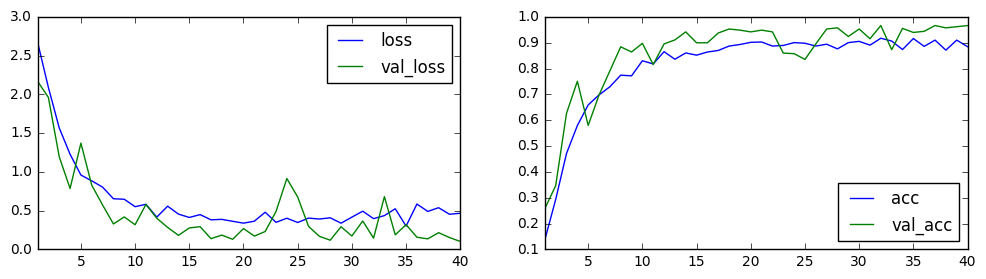

In [40]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 3)
fig, axes = plt.subplots(nrows=1, ncols=2)

df[['loss', 'val_loss']].plot(ax=axes[0])
# df['val_loss'].plot(ax=axes[1, 0])
df[['acc', 'val_acc']].plot(ax=axes[1])
# df['val_acc'].plot(ax=axes[1, 1])
plt.show()